# 의약품 처방정보
## 1. 소개
공공 데이터 포털에서 제공하는 의약품 처방 정보를 이용해 분석과 EDA를 진행해본 프로젝트

## 2. 목표
- EDA와 시각화
- 대용량 데이터 다뤄보기

## 3. 데이터 셋
[공공 데이터 포털](https://www.data.go.kr/data/15007117/fileData.do)에서 제공하는 의약품 처방 정보  
<img src="https://i.imgur.com/hsrpJp4.png">

## 4. 구현


### 라이브러리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 한글 폰트 설정

In [ ]:
# 데이터 시각화 도구에서 한글을 그대로 출력하게 되면 글자가 깨져서 나오게 되기 때문에 글꼴설정을 합니다.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
import matplotlib.pyplot as plt
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### Data Load

In [3]:
import glob
glob.glob("data/*")

['data\\HP_T60_2020_1.CSV',
 'data\\HP_T60_2020_2.CSV',
 'data\\HP_T60_2020_3.CSV']

In [5]:
df_1 = pd.read_csv("data/HP_T60_2020_1.CSV", encoding="cp949")
df_2 = pd.read_csv("data/HP_T60_2020_2.CSV", encoding="cp949")
df_3 = pd.read_csv("data/HP_T60_2020_3.CSV", encoding="cp949")

In [6]:
df_1.shape, df_2.shape, df_3.shape

((10994920, 15), (10952199, 15), (10923225, 15))

In [11]:
df = pd.concat([df_1, df_2], axis=0)
df = pd.concat([df, df_3], axis=0)

In [12]:
df.shape

(32870344, 15)

In [13]:
df.sample(10)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
5049702,2020,148294,8405480,3,2,15,11,2020-12-22,152302ATR,1.0,2,7,190.0,2660,2021-12-29
3592575,2020,776325,11273877,3,2,10,11,2020-02-27,430101ATB,1.0,3,7,124.0,2604,2021-12-29
1097653,2020,700435,12000010,4,1,2,41,2020-02-03,150045ASY,4.0,3,3,34.0,1224,2021-12-29
2850840,2020,5231,9432604,2,1,13,41,2020-01-02,246501ATB,1.0,3,30,90.0,8100,2021-12-29
10898383,2020,665023,11376272,2,2,7,46,2020-07-01,614901ATB,1.0,2,7,152.0,2128,2021-12-29
5801180,2020,87262,2880730,2,2,13,27,2020-04-14,453902ATB,1.0,2,4,148.0,1184,2021-12-29
1205718,2020,369910,458386,3,2,11,44,2020-11-04,222901ATB,1.0,3,5,103.0,1545,2021-12-29
762342,2020,356418,1697285,3,2,12,45,2020-01-10,470901ATB,1.0,1,84,553.0,46452,2021-12-29
351595,2020,343893,11577673,5,2,6,26,2020-10-08,454001ATB,1.0,1,98,610.0,59780,2021-12-29
7960139,2020,575656,5537074,1,2,13,48,2020-08-31,157201ATB,1.0,3,4,3847.0,46164,2021-12-29


### 데이터 요약

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32870344 entries, 0 to 10923224
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   기준년도         int64  
 1   가입자 일련번호     int64  
 2   처방내역일련번호     int64  
 3   일련번호         int64  
 4   성별코드         int64  
 5   연령대코드(5세단위)  int64  
 6   시도코드         int64  
 7   요양개시일자       object 
 8   약품일반성분명코드    object 
 9   1회 투약량       float64
 10  1일투약량        int64  
 11  총투여일수        int64  
 12  단가           float64
 13  금액           int64  
 14  데이터 공개일자     object 
dtypes: float64(2), int64(10), object(3)
memory usage: 3.9+ GB


In [15]:
df.nunique()

기준년도                 1
가입자 일련번호       1000000
처방내역일련번호       8746682
일련번호                72
성별코드                 2
연령대코드(5세단위)         18
시도코드                17
요양개시일자             366
약품일반성분명코드         3024
1회 투약량            1158
1일투약량               33
총투여일수              328
단가                2727
금액               53976
데이터 공개일자             1
dtype: int64

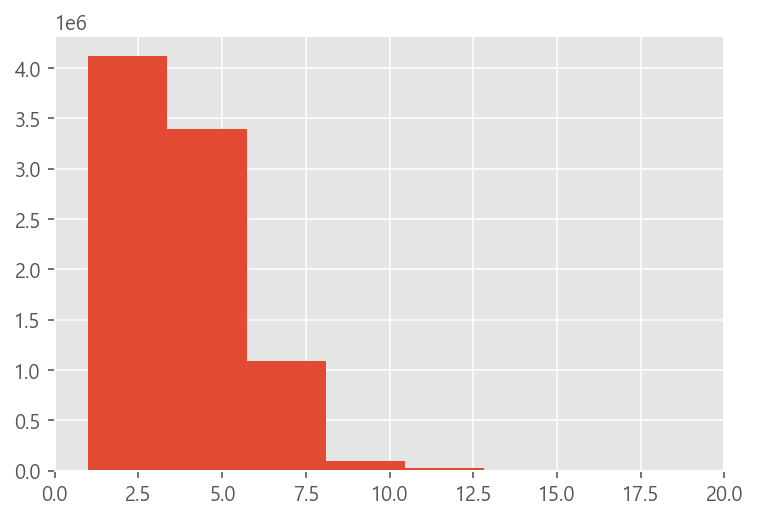

In [22]:
# 한 번 처방 받을 때 받는 약의 갯수
plt.xlim(0,20)
_ = df["처방내역일련번호"].value_counts().hist(bins=30)

### 전처리

In [24]:
df.isna().sum()

기준년도              0
가입자 일련번호          0
처방내역일련번호          0
일련번호              0
성별코드              0
연령대코드(5세단위)       0
시도코드              0
요양개시일자            0
약품일반성분명코드      2467
1회 투약량            0
1일투약량             0
총투여일수             0
단가                0
금액                0
데이터 공개일자          0
dtype: int64

### 결측치 처리

In [25]:
df = df.dropna()

### 사용하지 않는 데이터 제거

In [26]:
del df["데이터 공개일자"]
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액
0,2020,370,11788523,1,2,13,41,2020-10-16,222901ATB,1.0,3,3,103.0,927
1,2020,466,9794740,1,2,13,41,2020-06-05,222901ATB,1.0,3,3,103.0,927
2,2020,538,5620454,1,2,9,41,2020-11-28,222901ATB,1.0,3,3,103.0,927
3,2020,4502,10243587,1,2,14,41,2020-03-24,222901ATB,1.0,3,3,103.0,927
4,2020,4502,1097699,1,2,14,41,2020-10-31,222901ATB,1.0,3,3,103.0,927


### 데이터 타입 변경

In [27]:
df["요양개시일자"] = pd.to_datetime(df["요양개시일자"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32867877 entries, 0 to 10923224
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   기준년도         int64         
 1   가입자 일련번호     int64         
 2   처방내역일련번호     int64         
 3   일련번호         int64         
 4   성별코드         int64         
 5   연령대코드(5세단위)  int64         
 6   시도코드         int64         
 7   요양개시일자       datetime64[ns]
 8   약품일반성분명코드    object        
 9   1회 투약량       float64       
 10  1일투약량        int64         
 11  총투여일수        int64         
 12  단가           float64       
 13  금액           int64         
dtypes: datetime64[ns](1), float64(2), int64(10), object(1)
memory usage: 3.7+ GB


### 파생변수 (월, 일, 요일)

In [29]:
df['월'] = df['요양개시일자'].dt.month
df['일'] = df['요양개시일자'].dt.day
df['요일'] = df['요양개시일자'].dt.dayofweek
df['영문요일'] = df["요양개시일자"].dt.day_name()

In [30]:
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일
0,2020,370,11788523,1,2,13,41,2020-10-16,222901ATB,1.0,3,3,103.0,927,10,16,4,Friday
1,2020,466,9794740,1,2,13,41,2020-06-05,222901ATB,1.0,3,3,103.0,927,6,5,4,Friday
2,2020,538,5620454,1,2,9,41,2020-11-28,222901ATB,1.0,3,3,103.0,927,11,28,5,Saturday
3,2020,4502,10243587,1,2,14,41,2020-03-24,222901ATB,1.0,3,3,103.0,927,3,24,1,Tuesday
4,2020,4502,1097699,1,2,14,41,2020-10-31,222901ATB,1.0,3,3,103.0,927,10,31,5,Saturday


### 파생변수 (시도명)

In [31]:
city = """11 서울특별시
42 강원도
26 부산광역시
43 충청북도
27 대구광역시
44 충청남도
28 인천광역시
45 전라북도
29 광주광역시
46 전라남도
30 대전광역시
47 경상북도
31 울산광역시
48 경상남도
36 세종특별자치시
49 제주특별자치도
41 경기도"""
city

'11 서울특별시\n42 강원도\n26 부산광역시\n43 충청북도\n27 대구광역시\n44 충청남도\n28 인천광역시\n45 전라북도\n29 광주광역시\n46 전라남도\n30 대전광역시\n47 경상북도\n31 울산광역시\n48 경상남도\n36 세종특별자치시\n49 제주특별자치도\n41 경기도'

In [32]:
city_list = city.split("\n")
city_name = {c.split()[0] : c.split()[1] for c in city_list}
city_name

{'11': '서울특별시',
 '42': '강원도',
 '26': '부산광역시',
 '43': '충청북도',
 '27': '대구광역시',
 '44': '충청남도',
 '28': '인천광역시',
 '45': '전라북도',
 '29': '광주광역시',
 '46': '전라남도',
 '30': '대전광역시',
 '47': '경상북도',
 '31': '울산광역시',
 '48': '경상남도',
 '36': '세종특별자치시',
 '49': '제주특별자치도',
 '41': '경기도'}

In [33]:
df['시도명'] = df["시도코드"].astype(str).map(lambda x: city_name[x])

### 파생변수 (연령대)

In [34]:
age_code = """1 00~04세 
2 05~09세
3 10~14세
4 15~19세
5 20~24세
6 25~29세
7 30~34세
8 35~39세
9 40~44세
10 45~49세
11 50~54세
12 55~59세
13 60~64세
14 65~69세
15 70~74세
16 75~79세
17 80~84세
18 85세+"""
age_code

'1 00~04세 \n2 05~09세\n3 10~14세\n4 15~19세\n5 20~24세\n6 25~29세\n7 30~34세\n8 35~39세\n9 40~44세\n10 45~49세\n11 50~54세\n12 55~59세\n13 60~64세\n14 65~69세\n15 70~74세\n16 75~79세\n17 80~84세\n18 85세+'

In [35]:
age_list = age_code.split("\n")
age_dict = {a.split()[0] : a.split()[1] for a in age_list}
age_dict

{'1': '00~04세',
 '2': '05~09세',
 '3': '10~14세',
 '4': '15~19세',
 '5': '20~24세',
 '6': '25~29세',
 '7': '30~34세',
 '8': '35~39세',
 '9': '40~44세',
 '10': '45~49세',
 '11': '50~54세',
 '12': '55~59세',
 '13': '60~64세',
 '14': '65~69세',
 '15': '70~74세',
 '16': '75~79세',
 '17': '80~84세',
 '18': '85세+'}

In [36]:
df["연령대"] = df["연령대코드(5세단위)"].astype(str).map(lambda x: age_dict[x])

### 파생변수 (성별)

In [37]:
gender_dict = {1 : "남", 2 : "여"}
df["성별"] = df["성별코드"].map(gender_dict)

### 파생변수 (투여경로, 제형)

In [38]:
# 투여 경로명, 제형명 파생변수 만들기
table = pd.read_html("https://www.health.kr/drug_info/basedrug/main_ingredient.html")
# 제형명
code, name = table[1]["제형코드"], table[1]["제형명칭"]
form = dict(zip(code, name))
# 투여 경로명
route = {"A":"내복제", "B":"주사제", "C":"외용제", "D":"기타"}

df["투여경로명"] = df["약품일반성분명코드"].str[6].map(lambda x: route[x])
df["제형명칭"] = df["약품일반성분명코드"].str[7:9].map(lambda x: form[x])

In [39]:
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,...,금액,월,일,요일,영문요일,시도명,연령대,성별,투여경로명,제형명칭
0,2020,370,11788523,1,2,13,41,2020-10-16,222901ATB,1.0,...,927,10,16,4,Friday,경기도,60~64세,여,내복제,"정제, 저작정"
1,2020,466,9794740,1,2,13,41,2020-06-05,222901ATB,1.0,...,927,6,5,4,Friday,경기도,60~64세,여,내복제,"정제, 저작정"
2,2020,538,5620454,1,2,9,41,2020-11-28,222901ATB,1.0,...,927,11,28,5,Saturday,경기도,40~44세,여,내복제,"정제, 저작정"
3,2020,4502,10243587,1,2,14,41,2020-03-24,222901ATB,1.0,...,927,3,24,1,Tuesday,경기도,65~69세,여,내복제,"정제, 저작정"
4,2020,4502,1097699,1,2,14,41,2020-10-31,222901ATB,1.0,...,927,10,31,5,Saturday,경기도,65~69세,여,내복제,"정제, 저작정"


### 시각화

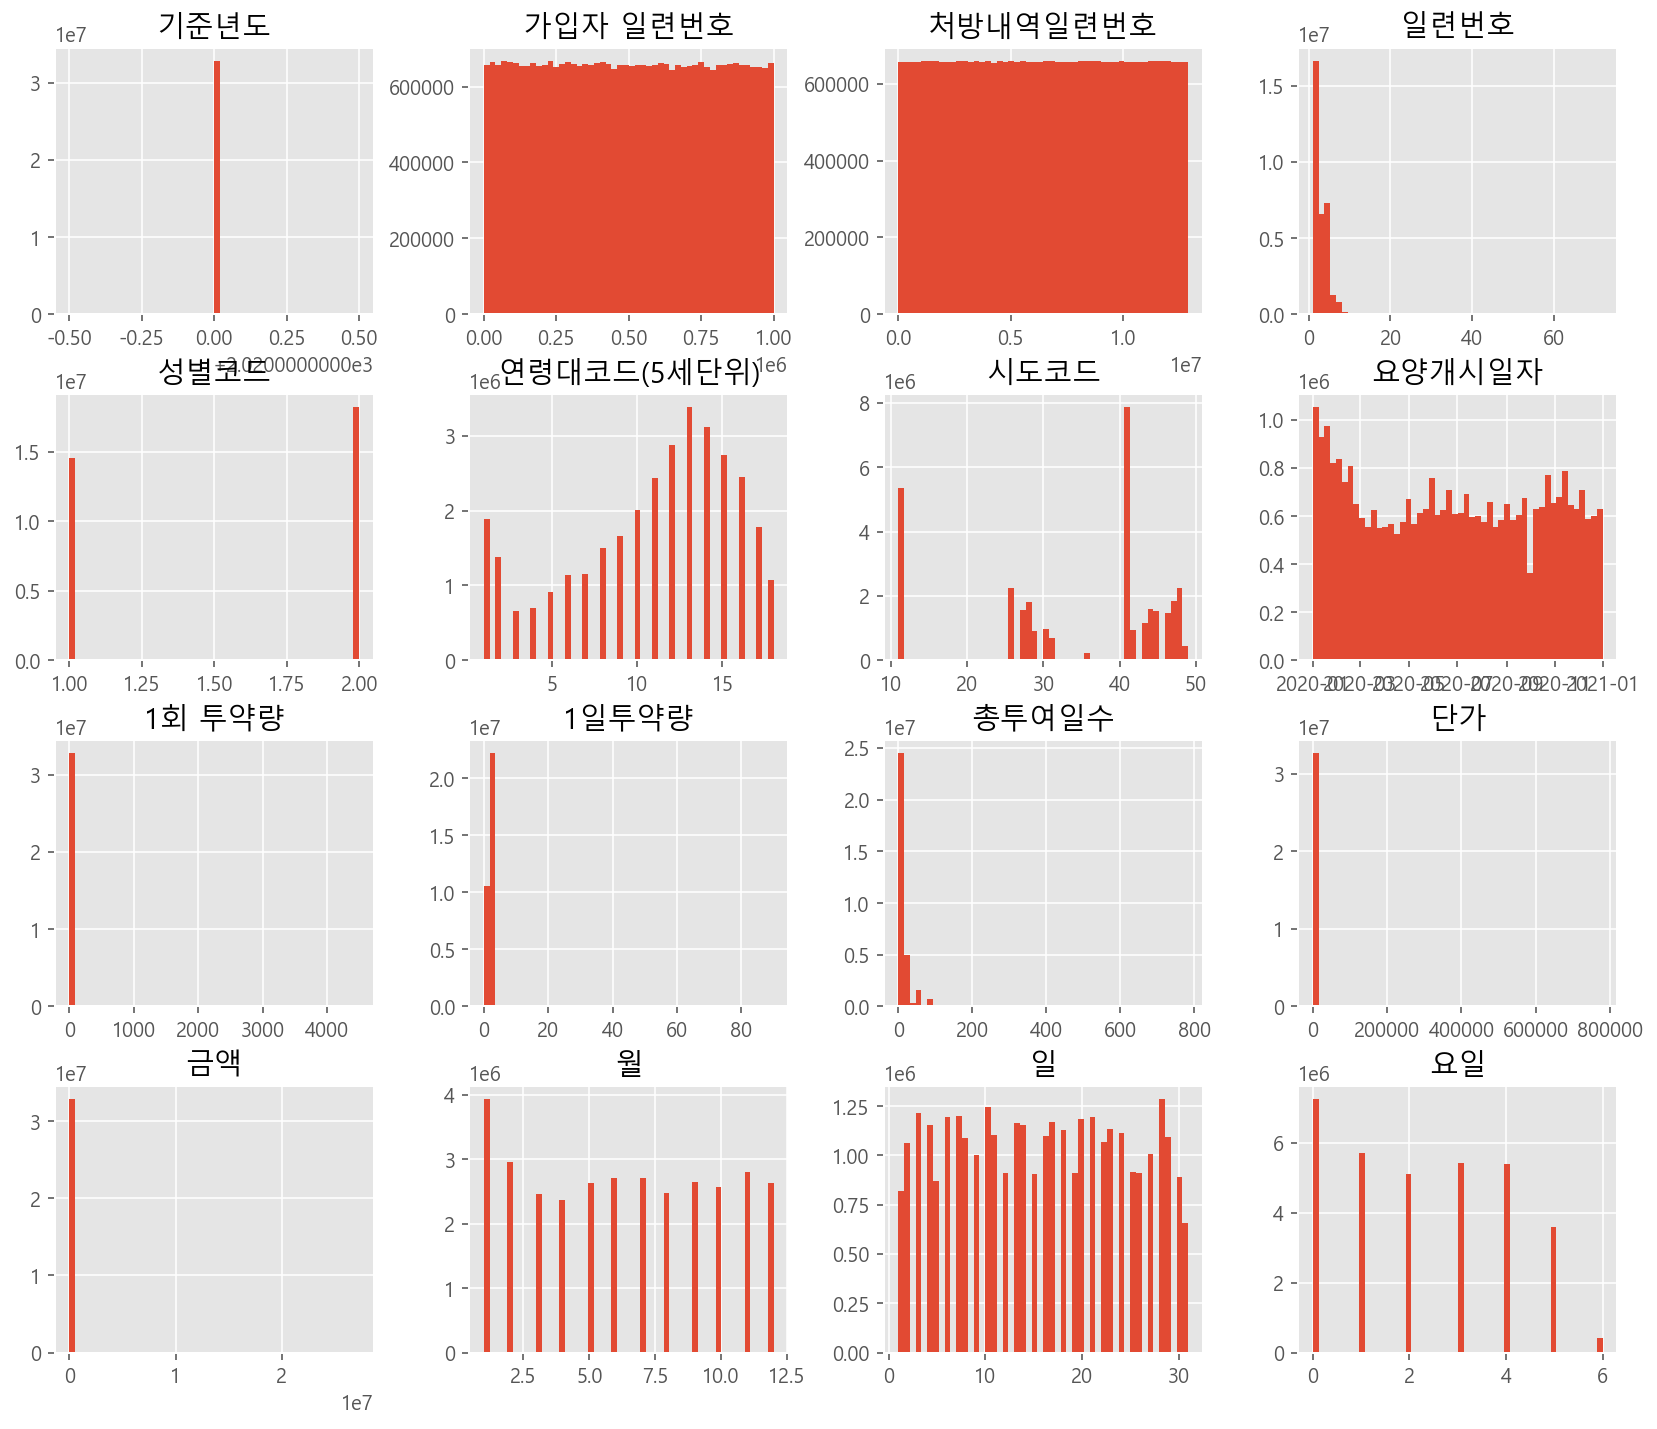

In [41]:
_ = df.hist(figsize=(14,12), bins=50)

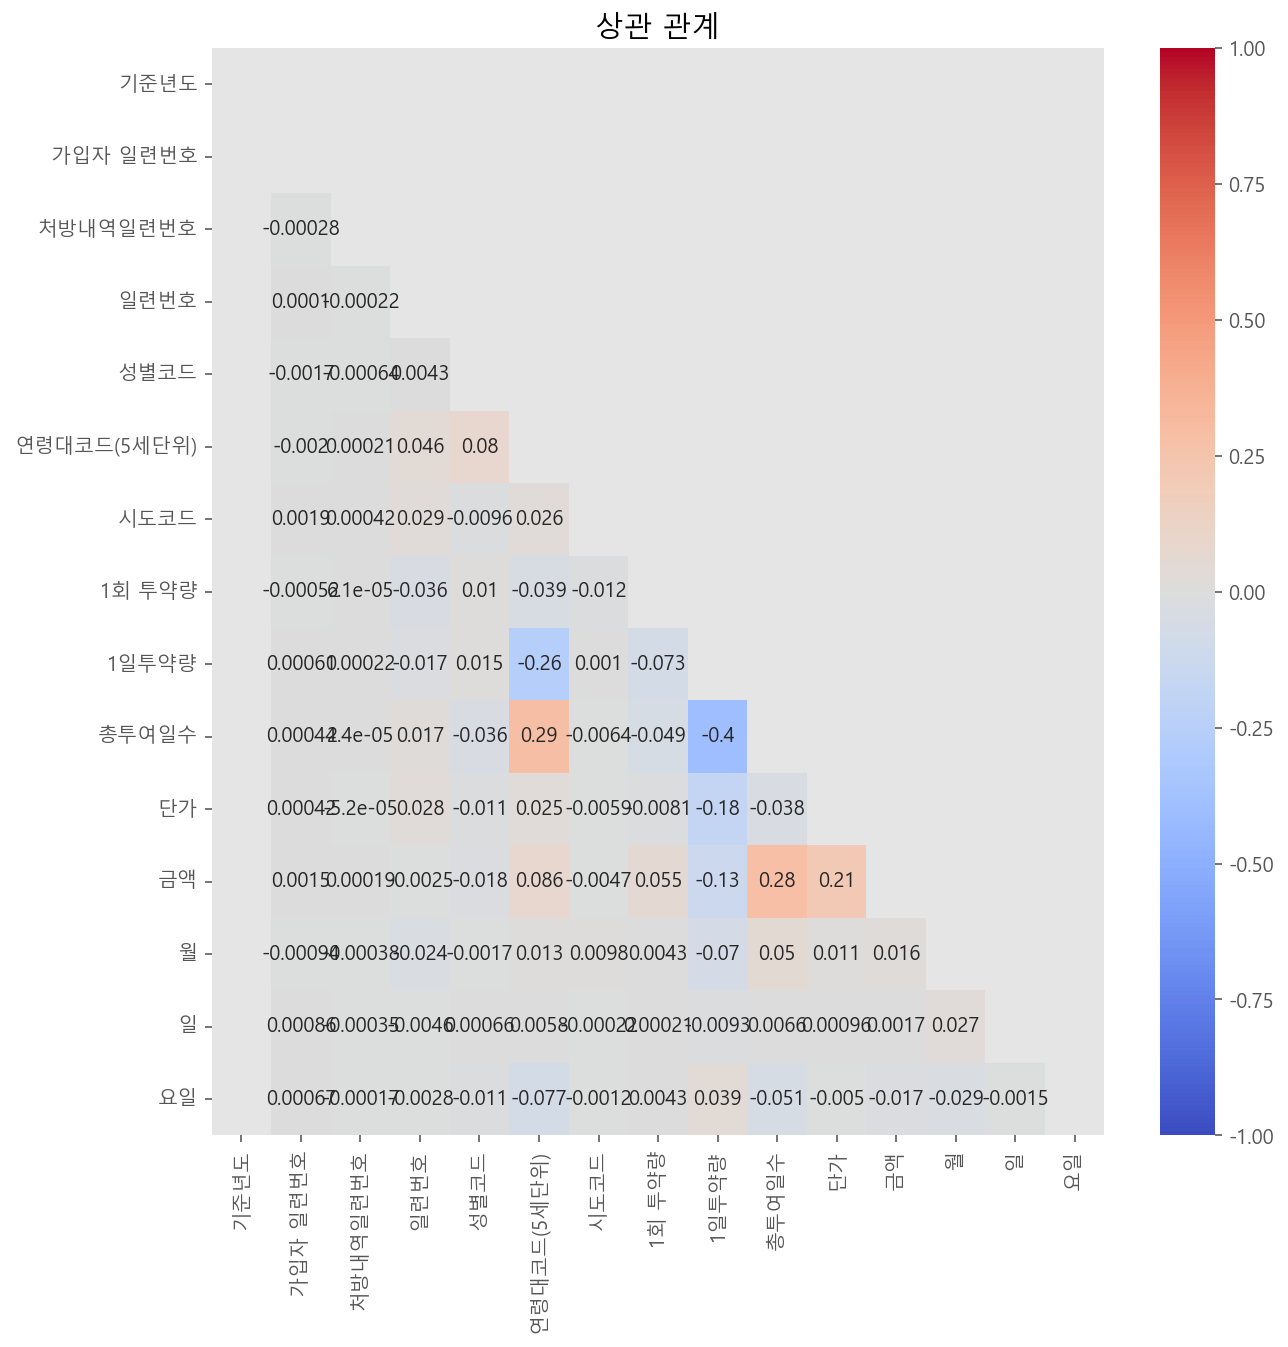

In [46]:
plt.figure(figsize=(10, 10))
_ = sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=np.triu(np.ones_like(df.corr()))).set_title("상관 관계")

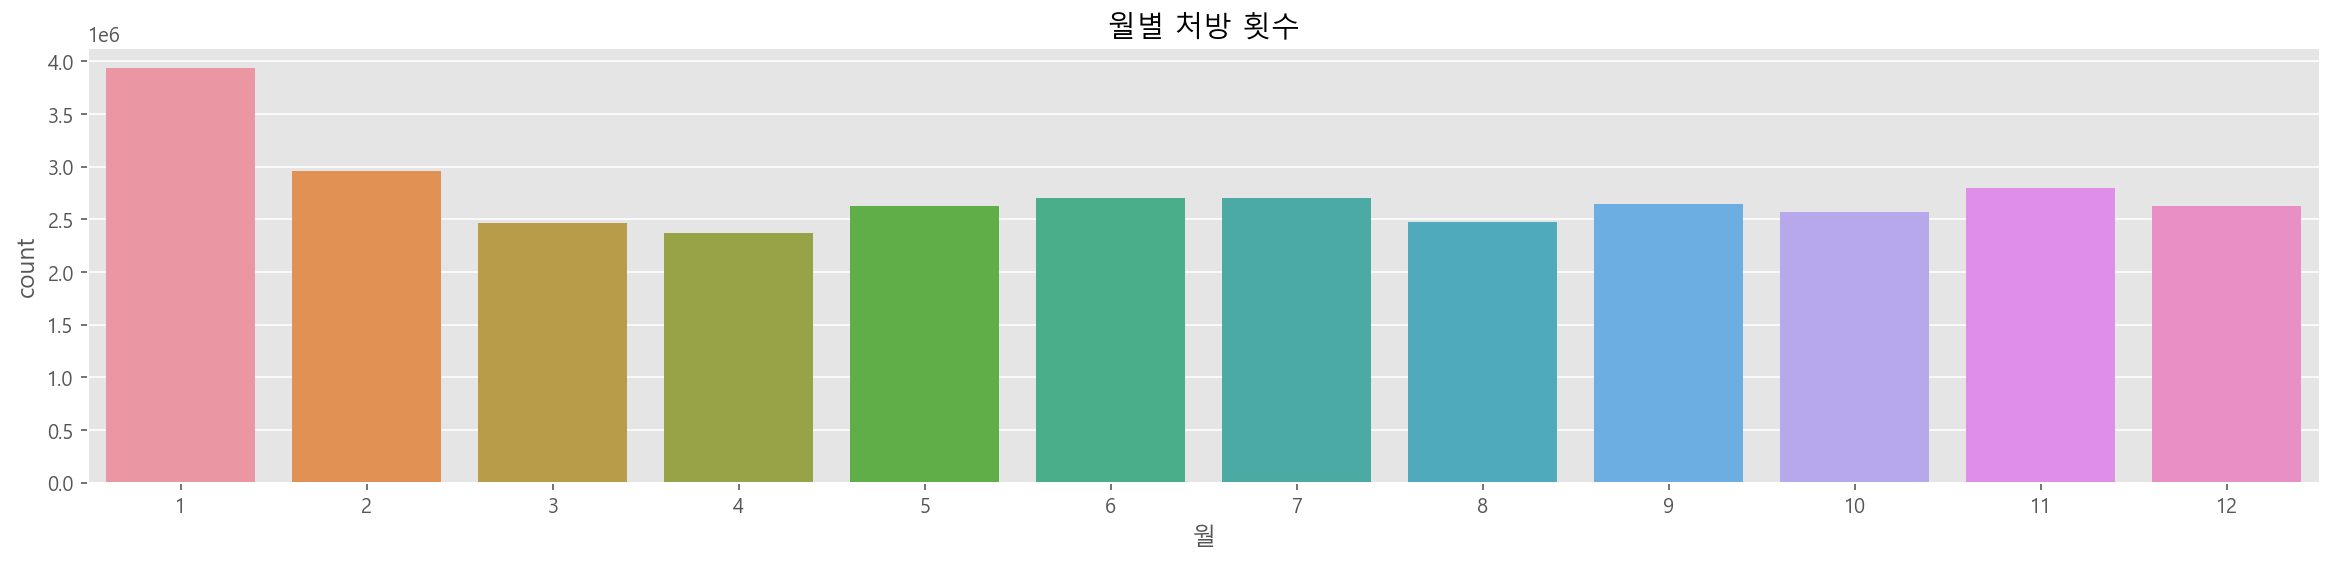

In [47]:
plt.figure(figsize=(20, 4))
_ = sns.countplot(data=df, x="월").set_title("월별 처방 횟수")

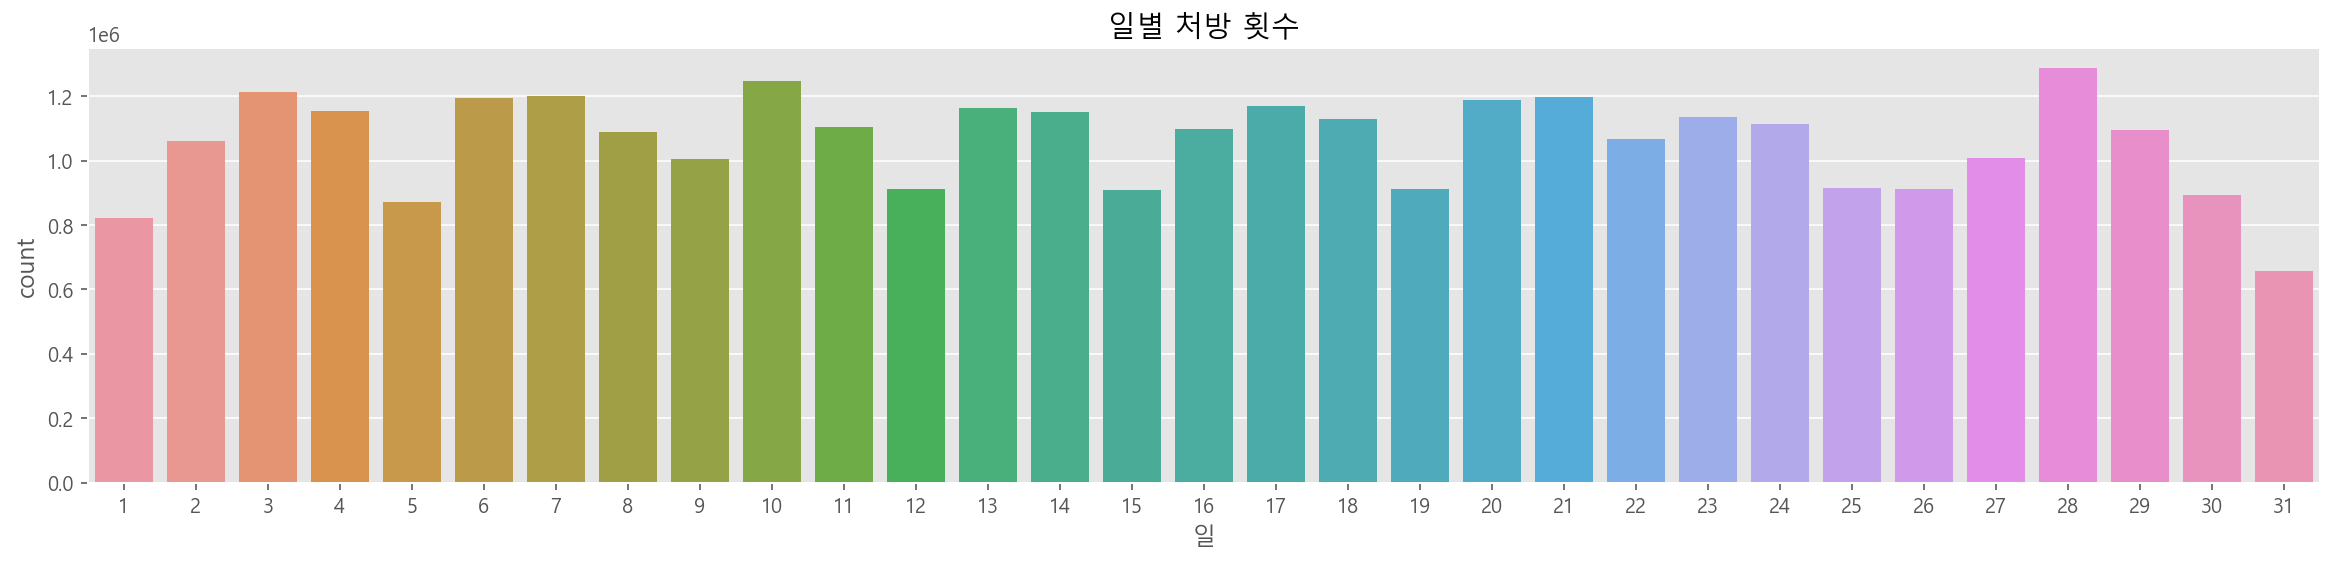

In [48]:
plt.figure(figsize=(20, 4))
_ = sns.countplot(data=df, x="일").set_title("일별 처방 횟수")

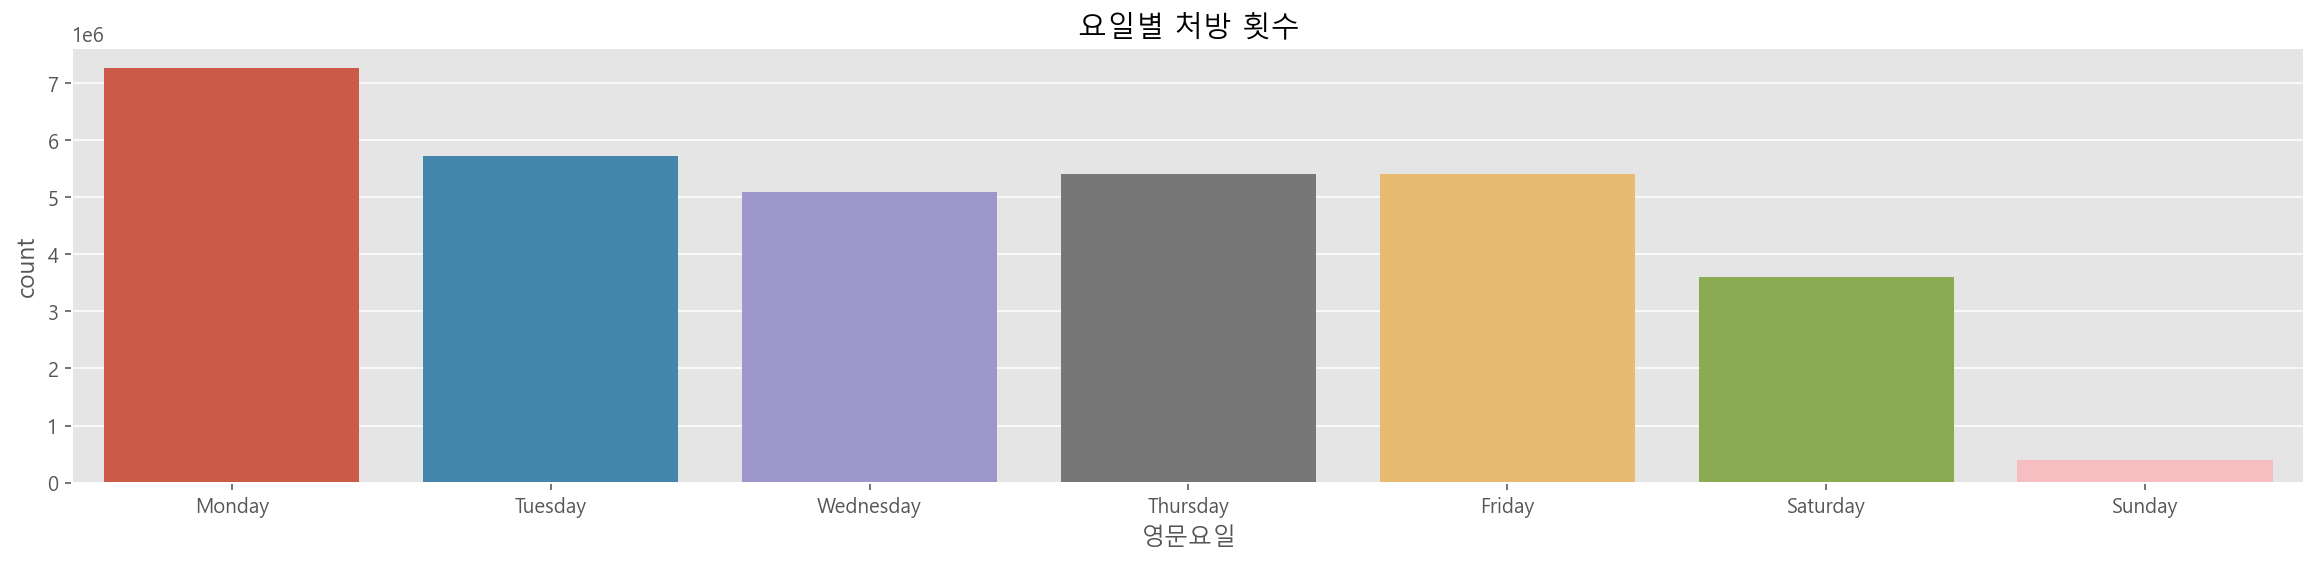

In [49]:
plt.figure(figsize=(20, 4))
_ = sns.countplot(data=df.sort_values("요일"), x="영문요일").set_title("요일별 처방 횟수")

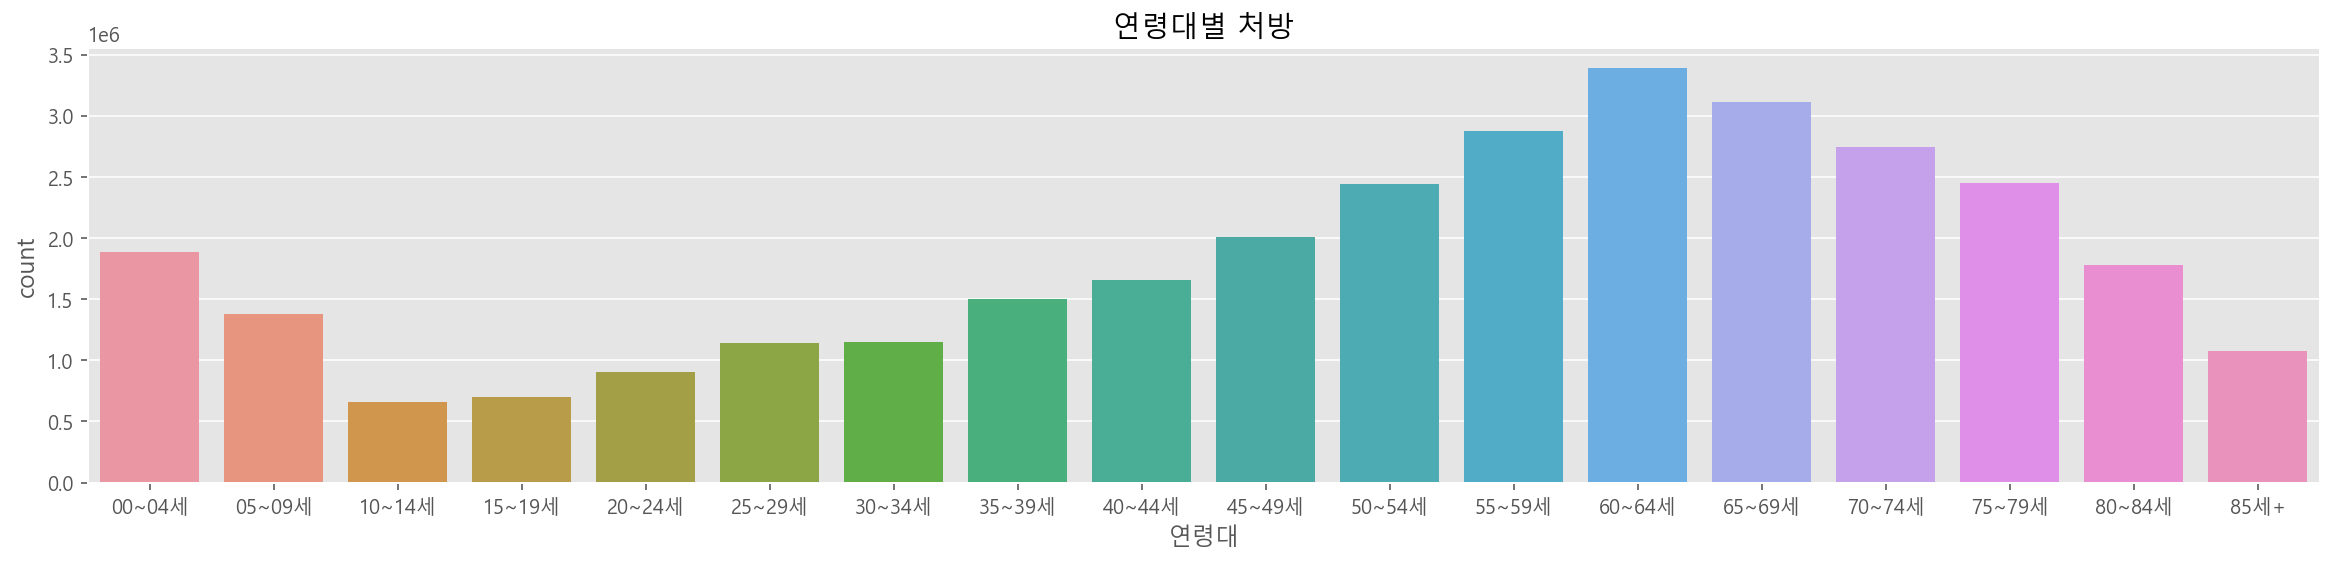

In [50]:
plt.figure(figsize=(20, 4))
_ = sns.countplot(data=df.sort_values("연령대코드(5세단위)"), x="연령대").set_title("연령대별 처방")

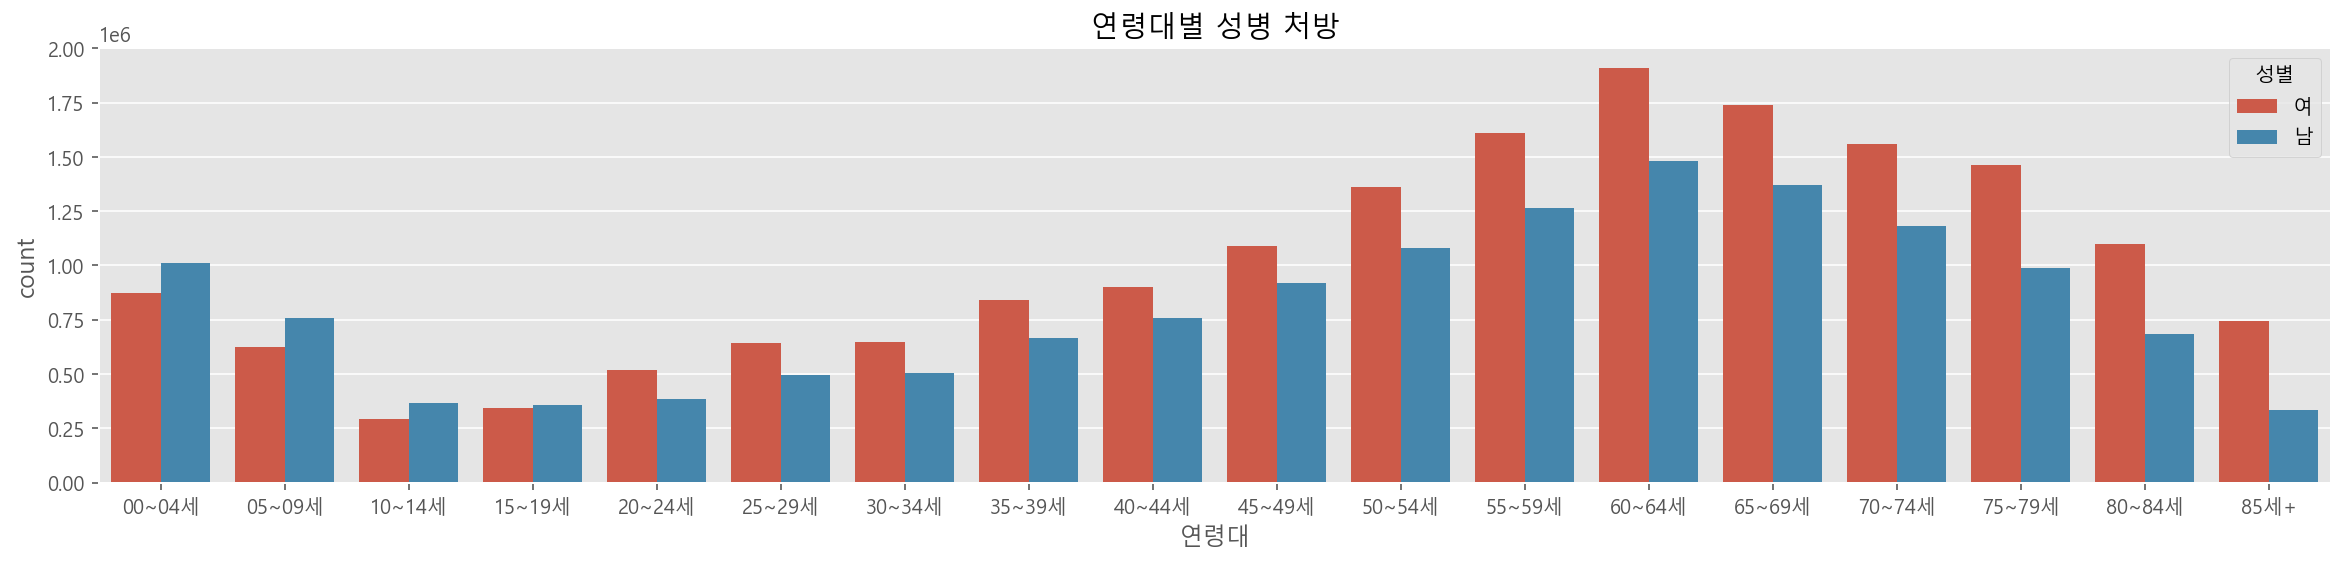

In [51]:
plt.figure(figsize=(20, 4))
_ = sns.countplot(data=df.sort_values("연령대코드(5세단위)"), x="연령대", hue="성별").set_title("연령대별 성병 처방")

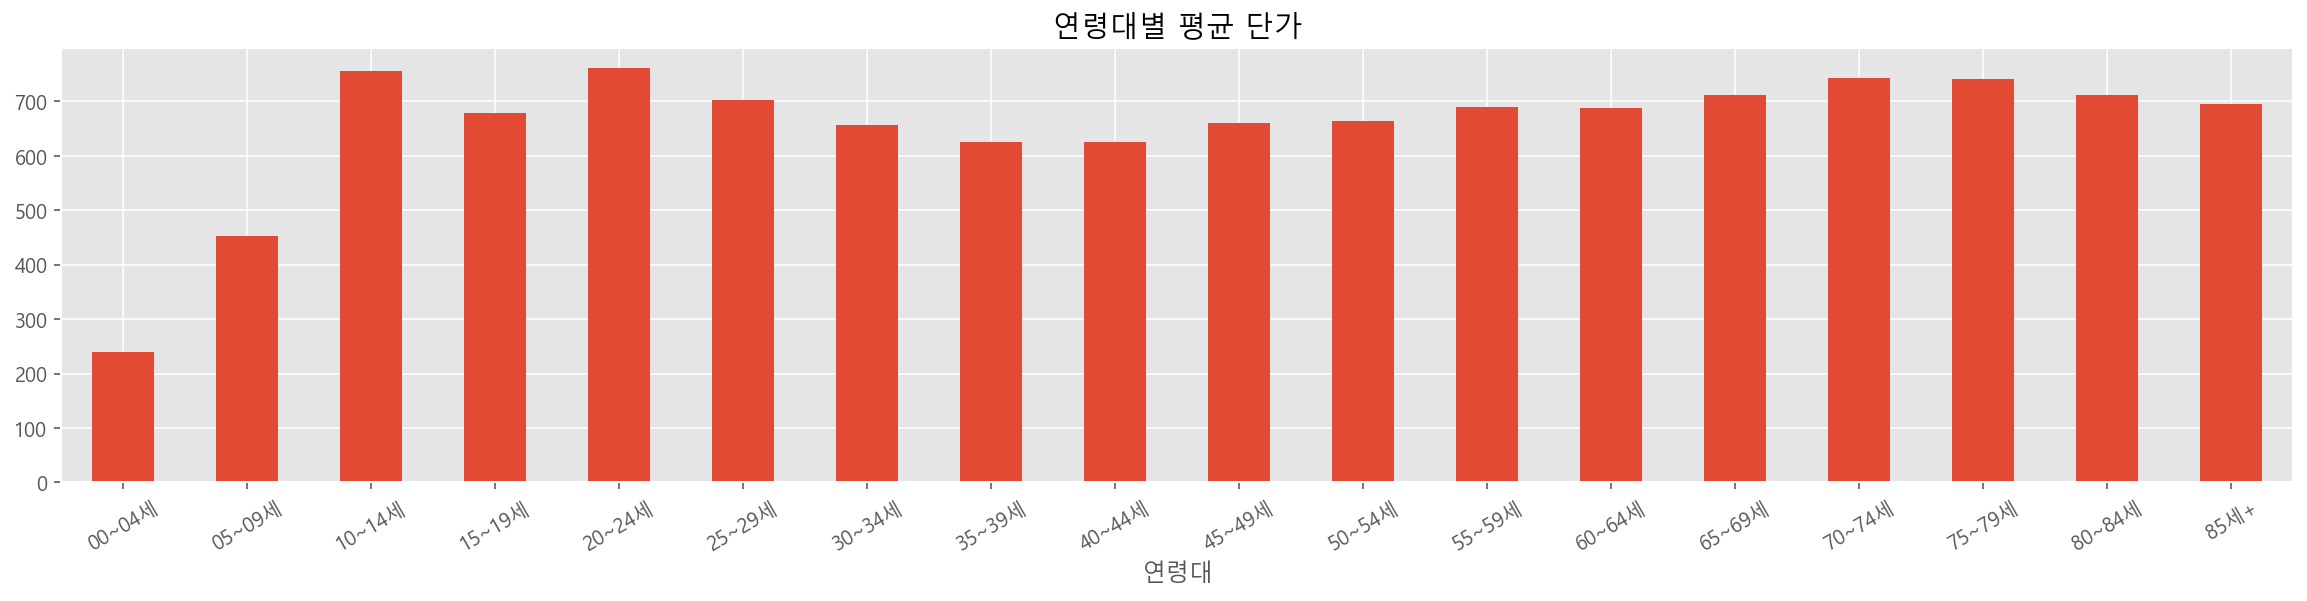

In [52]:
plt.figure(figsize=(20, 4))
_ = df.groupby("연령대")["단가"].mean().plot(kind="bar", rot=30).set_title("연령대별 평균 단가")

<Figure size 1440x288 with 0 Axes>

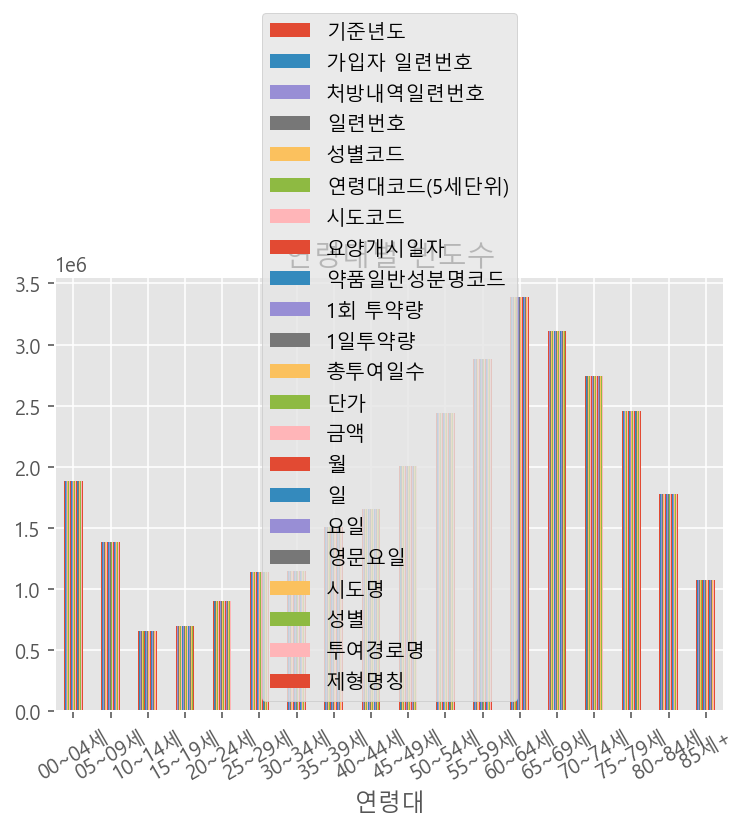

In [53]:
plt.figure(figsize=(20, 4))
_ = df.groupby("연령대").count().plot(kind="bar", rot=30).set_title("연령대별 빈도수")